In [14]:
import os
import pandas as pd
import numpy as np

# Set OMP_NUM_THREADS to 1 to potentially mitigate memory leak warnings
os.environ['OMP_NUM_THREADS'] = '1'

# Load the dataset
data = pd.read_csv('C:/Users/ebenr/OneDrive/Documents/dataset/Country-data.csv')


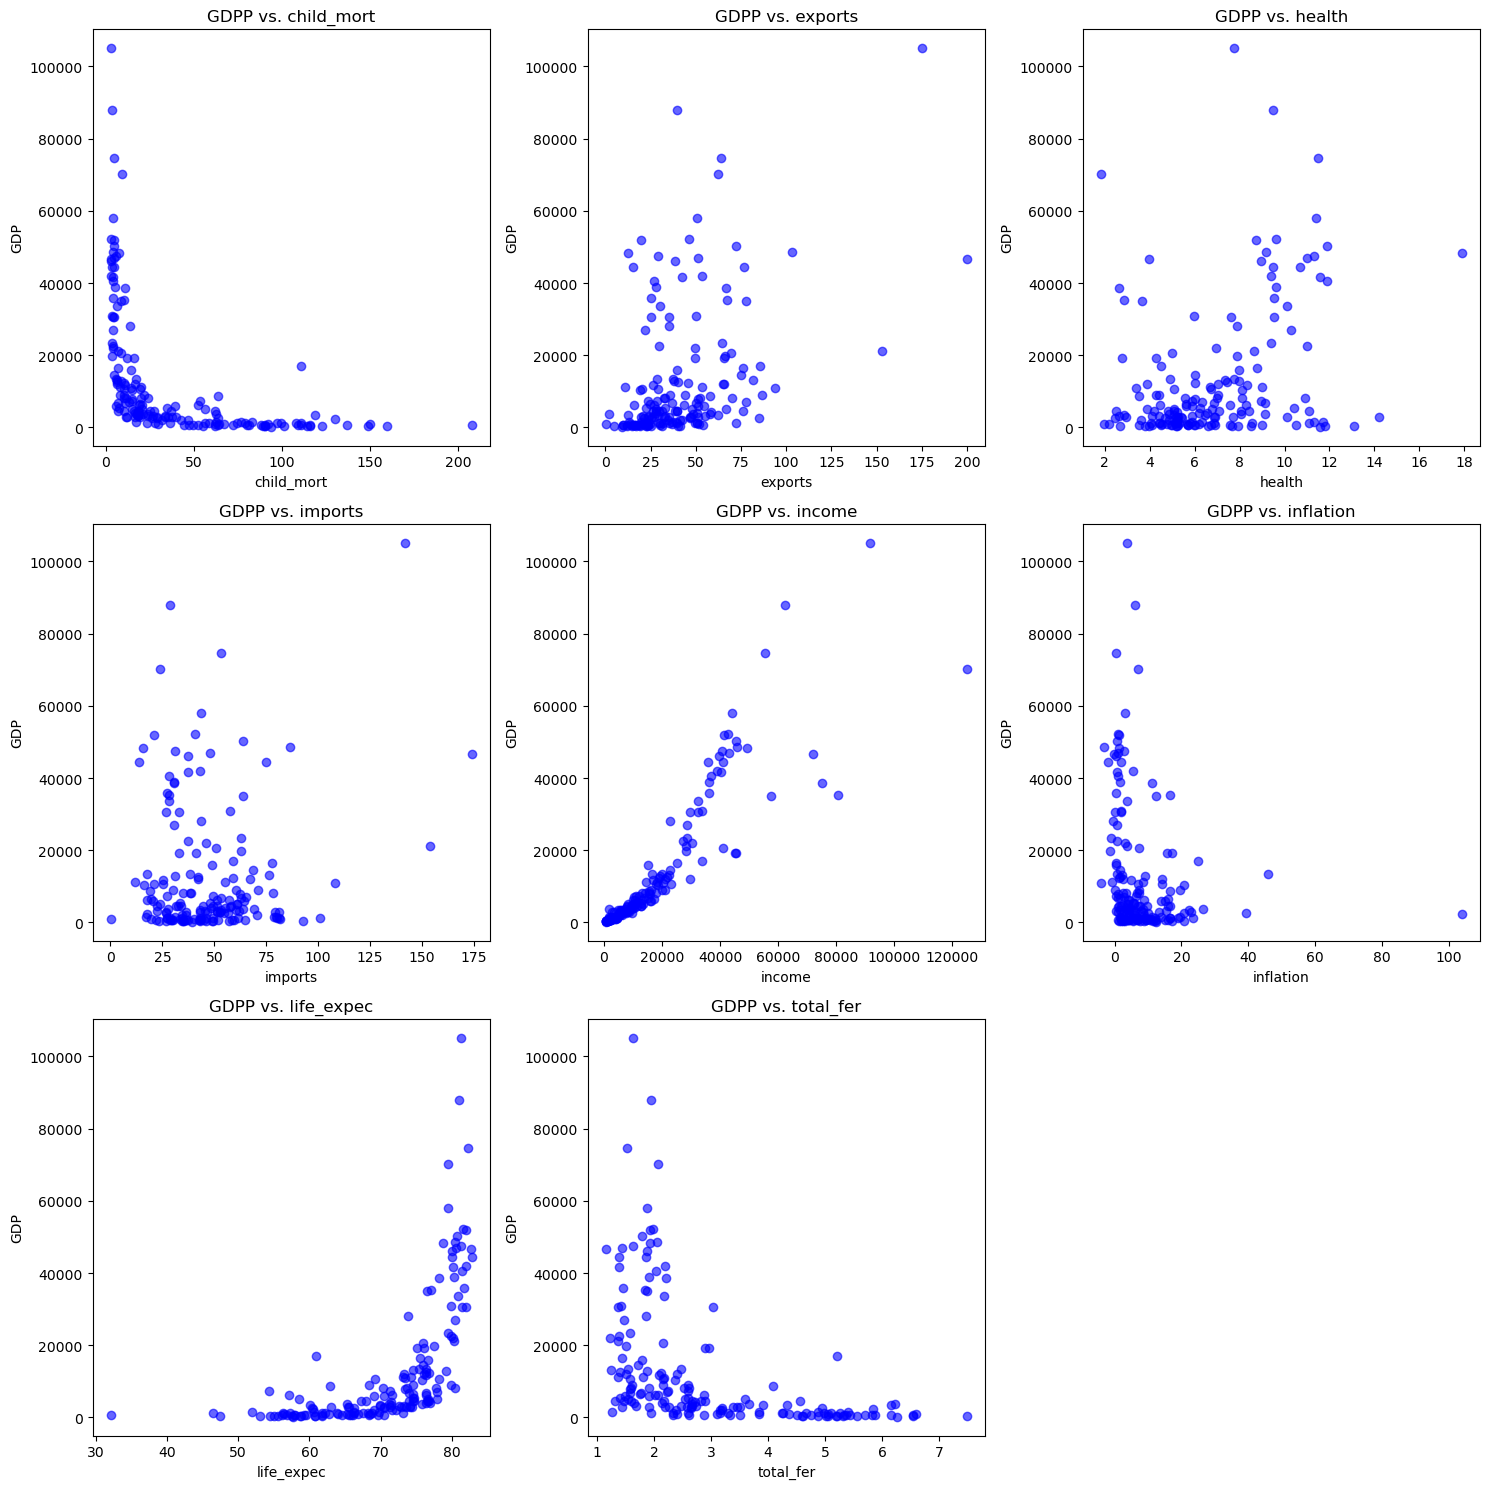

In [15]:
import matplotlib.pyplot as plt

# Create scatter plots for GDPP vs. other variables
plt.figure(figsize=(15, 15))
variables_to_plot = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer']

for i, var in enumerate(variables_to_plot, start=1):
    plt.subplot(3, 3, i)
    plt.scatter(data[var], data['gdpp'], c='blue', alpha=0.6)
    plt.title(f'GDPP vs. {var}')
    plt.xlabel(var)
    plt.ylabel('GDP')

plt.tight_layout()
plt.show()


C:\Users\ebenr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ebenr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ebenr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ebenr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

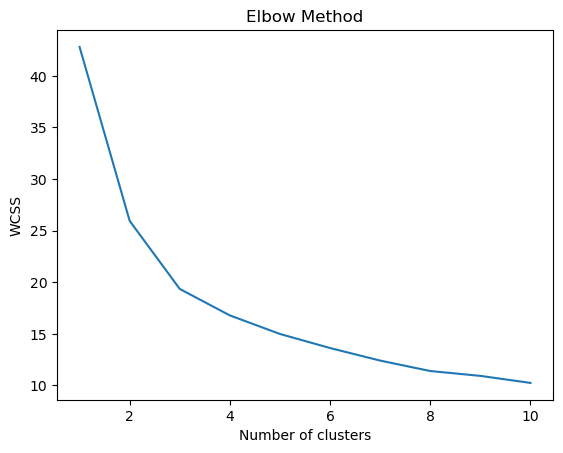

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Drop non-numeric columns
non_numeric_cols = ['country']
data_numeric = data.drop(non_numeric_cols, axis=1)

# Normalize the dataset using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Find the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()


C:\Users\ebenr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


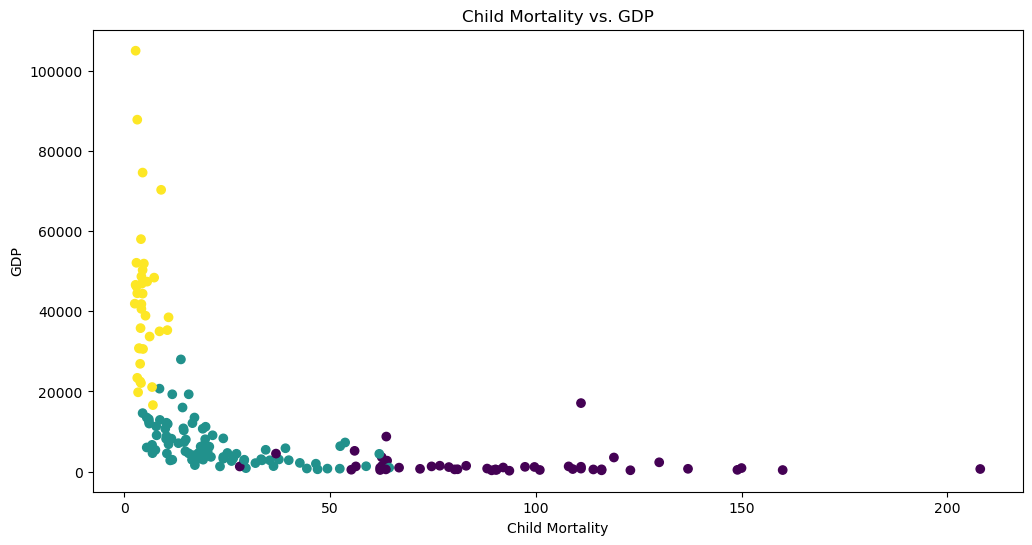

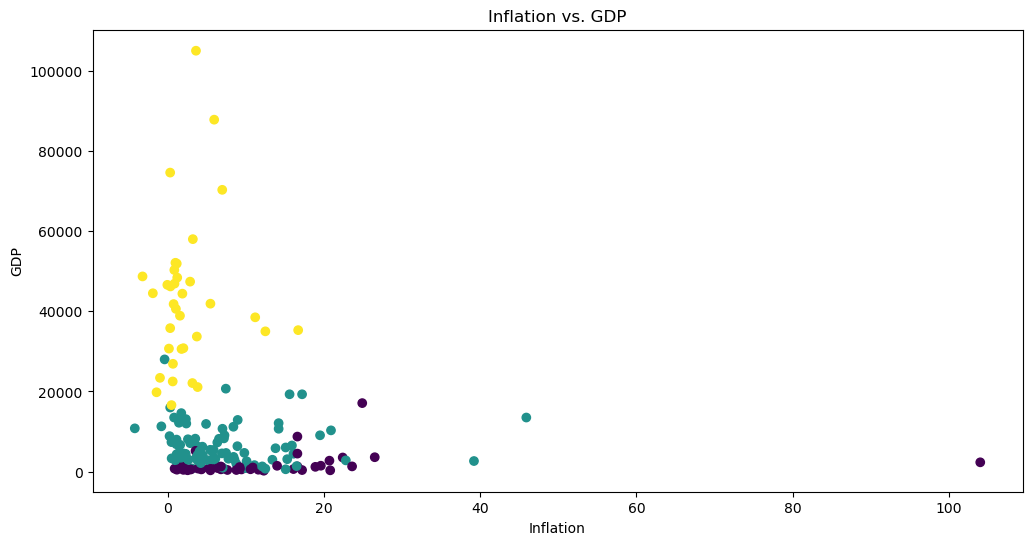

                 country  child_mort   gdpp  inflation  cluster  \
0            Afghanistan        90.2    553       9.44        0   
1                Albania        16.6   4090       4.49        1   
2                Algeria        27.3   4460      16.10        1   
3                 Angola       119.0   3530      22.40        0   
4    Antigua and Barbuda        10.3  12200       1.44        1   
..                   ...         ...    ...        ...      ...   
162              Vanuatu        29.2   2970       2.62        1   
163            Venezuela        17.1  13500      45.90        1   
164              Vietnam        23.3   1310      12.10        1   
165                Yemen        56.3   1310      23.60        0   
166               Zambia        83.1   1460      14.00        0   

                        group  
0             Least Developed  
1    Developing and Developed  
2    Developing and Developed  
3             Least Developed  
4    Developing and Developed  
.. 

In [17]:
# Choose an optimal number of clusters (e.g., 3) based on the elbow method graph
optimal_num_clusters = 3

# Fit the scaled dataset to the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original dataset
data['cluster'] = clusters

# Visualize clusters: Scatter plot for Child Mortality vs. GDP
plt.figure(figsize=(12, 6))
plt.scatter(data['child_mort'], data['gdpp'], c=data['cluster'], cmap='viridis')
plt.title('Child Mortality vs. GDP')
plt.xlabel('Child Mortality')
plt.ylabel('GDP')
plt.show()

# Visualize clusters: Scatter plot for Inflation vs. GDP
plt.figure(figsize=(12, 6))
plt.scatter(data['inflation'], data['gdpp'], c=data['cluster'], cmap='viridis')
plt.title('Inflation vs. GDP')
plt.xlabel('Inflation')
plt.ylabel('GDP')
plt.show()

# Label the groups based on Child Mortality, GDP, and Inflation
data['group'] = np.nan
data.loc[data['cluster'] == 0, 'group'] = 'Least Developed'
data.loc[data['cluster'] == 1, 'group'] = 'Developing and Developed'
data.loc[data['cluster'] == 2, 'group'] = 'Developed'

# Print the first few rows of the dataset with clusters and groups
print(data[['country', 'child_mort', 'gdpp', 'inflation', 'cluster', 'group']])
